# Multi-task Modelling

In this tutorial, we will show how to train a multi-task model with QSPRpred that predicts affinity for the four human adenosine receptors (A1, A2A, A2B, A3).

Here we will load the `AR_LIGANDS.tsv` file that contains the ligands for the four receptors. 
However, the activities are all in the same column, so we will need to split them into four columns, one for each receptor.

In [12]:
import os
import pandas as pd

# load the data
df = pd.read_csv('../../tutorial_data/AR_LIGANDS.tsv', sep='\t')

display(df.head())

# pivot the dataframe to have the accession as columns
df = df.pivot(index="SMILES", columns="accession", values="pchembl_value_Mean")
df.columns.name = None
df.reset_index(inplace=True)

display(df.head())

,SMILES,pchembl_value_Mean,accession
0,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,8.68,P29274
1,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,6.68,P30542
2,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,4.82,P29274
3,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,7.15,P0DMS8
4,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,P29274


,SMILES,P0DMS8,P29274,P29275,P30542
0,Brc1cc(Nc2nc3c(ncnc3N3CCCC3)s2)ccc1,5.89,6.61,NaN,NaN
1,C#CCCCC#Cc1nc(NCc2cc(Cl)ccc2)c2ncn(C3C(O)C(O)C...,7.63,5.36,NaN,NaN
2,C#CCCCCC#Cc1nc(NCc2cc(Cl)ccc2)c2ncn(C3C(O)C(O)...,7.53,5.15,NaN,NaN
3,C#CCCCCC(=O)NCCNC(=O)COc1ccc(CCCn2ncc3c2nc(N)n...,5.89,7.12,NaN,5.96
4,C#CCCCCCNC(=O)Nc1nc2nn(C)cc2c2nc(-c3ccco3)nn12,7.89,6.32,NaN,NaN


Now that we have our data in the right format, we can create the multi-task `QSPRDataset`.
The main difference here is the specification of multi-task, which is done by having a list of target properties instead of a single one.
Note, that we specify each property here as a regression task, which makes this model a multi-task regression model. It is also possible to specify all classification tasks or a mix of classification and regression tasks. However, there are currently no build-in models that support mixed tasks. See the [custom model tutorial](custom_model.ipynb) for more information on how to implement a custom model.

Furthermore, as you may have noticed, there are a lot of missing values in the data. Therefore, we will use a mean imputation from scikit-learn here, to fill in the missing values.

In [15]:
from qsprpred.data.data import QSPRDataset
from sklearn.impute import SimpleImputer

target_props = [{"name": "P0DMS8", "task": "REGRESSION"},
                {"name": "P29274", "task": "REGRESSION"},
                {"name": "P29275", "task": "REGRESSION"},
                {"name": "P30542", "task": "REGRESSION"}]

dataset = QSPRDataset(
    name="MultiTaskTutorialDataset",
    df=df,
    target_props=target_props,
    store_dir="../../tutorial_output/data",
    target_imputer=SimpleImputer(strategy="mean"),
    random_state=42,
)

dataset.getDF()

,SMILES,P0DMS8,P29274,P29275,P30542,QSPRID,P0DMS8_imputed,P29274_imputed,P29275_imputed,P30542_imputed
QSPRID,,,,,,,,,,
MultiTaskTutorialDataset_0,Brc1cc(Nc2nc3c(ncnc3N3CCCC3)s2)ccc1,5.89,6.61,NaN,NaN,MultiTaskTutorialDataset_0,5.89,6.610000,7.077226,6.610345
MultiTaskTutorialDataset_1,C#CCCCC#Cc1nc(NCc2cc(Cl)ccc2)c2ncn(C3C(O)C(O)C...,7.63,5.36,NaN,NaN,MultiTaskTutorialDataset_1,7.63,5.360000,7.077226,6.610345
MultiTaskTutorialDataset_2,C#CCCCCC#Cc1nc(NCc2cc(Cl)ccc2)c2ncn(C3C(O)C(O)...,7.53,5.15,NaN,NaN,MultiTaskTutorialDataset_2,7.53,5.150000,7.077226,6.610345
MultiTaskTutorialDataset_3,C#CCCCCC(=O)NCCNC(=O)COc1ccc(CCCn2ncc3c2nc(N)n...,5.89,7.12,NaN,5.96,MultiTaskTutorialDataset_3,5.89,7.120000,7.077226,5.960000
MultiTaskTutorialDataset_4,C#CCCCCCNC(=O)Nc1nc2nn(C)cc2c2nc(-c3ccco3)nn12,7.89,6.32,NaN,NaN,MultiTaskTutorialDataset_4,7.89,6.320000,7.077226,6.610345
...,...,...,...,...,...,...,...,...,...,...
MultiTaskTutorialDataset_6792,c1nc2c(nc(Nc3ccc(N4CCOCC4)cc3)nc2NC2CCC2)[nH]1,5.74,NaN,NaN,NaN,MultiTaskTutorialDataset_6792,5.74,6.894782,7.077226,6.610345
MultiTaskTutorialDataset_6793,c1nc2c(nc(Nc3ccc(N4CCOCC4)cc3)nc2NC2CCCC2)[nH]1,5.86,NaN,NaN,NaN,MultiTaskTutorialDataset_6793,5.86,6.894782,7.077226,6.610345
MultiTaskTutorialDataset_6794,c1nc2c(nc(Nc3ccc(N4CCOCC4)cc3)nc2NC2CCCCC2)[nH]1,6.18,NaN,NaN,NaN,MultiTaskTutorialDataset_6794,6.18,6.894782,7.077226,6.610345


Feature calculation and dataset preparation is the same as for single task models. During splitting compounds are assigned to the training or test set (not individual datapoints).

In [16]:
from qsprpred.data.utils.descriptorsets import FingerprintSet
from qsprpred.data.utils.descriptorcalculator import MoleculeDescriptorsCalculator
from qsprpred.data.utils.datasplitters import RandomSplit

# Calculate MorganFP
feature_calculator = MoleculeDescriptorsCalculator(desc_sets = [FingerprintSet(fingerprint_type="MorganFP", radius=3, nBits=2048)])

# calculate compound features and split dataset into train and test
dataset.prepareDataset(
    split=RandomSplit(test_fraction=0.2, dataset=dataset),
    feature_calculators=[feature_calculator]
)

print(f"Number of samples train set: {len(dataset.y)}")
print(f"Number of samples test set: {len(dataset.y_ind)}")

dataset.save()

Number of samples train set: 5437
Number of samples test set: 1360


### Training the model
We use a KNN model because it is relatively fast. 

In [18]:
from qsprpred.models.sklearn import SklearnModel
from qsprpred.models.metrics import SklearnMetric
from sklearn.neighbors import KNeighborsRegressor
from qsprpred.models.assessment_methods import CrossValAssessor, TestSetAssessor

os.makedirs('../../tutorial_output/models', exist_ok=True)

# This is an SKlearn model, so we will initialize it with the SklearnModel class
model = SklearnModel(
    base_dir = '../../tutorial_output/models',
    data=dataset,
    alg = KNeighborsRegressor,
    name='MultiTaskTutorialModel')

score_func = SklearnMetric.getDefaultMetric(model.task)
CrossValAssessor(score_func)(model)
TestSetAssessor(score_func)(model)

# Finally, we need to fit the model on the complete dataset if we want to use it further
model.fitAttached()

# and save the model
model.save()

'../../tutorial_output/models/MultiTaskTutorialModel/MultiTaskTutorialModel_meta.json'

### Model evaluation
Here we show how to calculate the metrics that are compatible with multitask model results using an `SklearnMetric` object. Currently, imputed values are included in this analysis, the option to remove these from the analysis will be added soon.

In [19]:
from qsprpred.models.metrics import SklearnMetric

import pandas as pd

# get independent test set
df = pd.read_table("../../tutorial_output/models/MultiTaskTutorialModel/MultiTaskTutorialModel.ind.tsv")

# column names containing original labels or predictions for the tasks
label_names = [i for i in list(df.columns.values) if "imputed_Label" in i] 
pred_names = [i for i in list(df.columns.values) if "imputed_Prediction" in i]
 
# turn into np array
ylabel = df[label_names].to_numpy()
ypred = df[pred_names].to_numpy()

# get metrics
summary = {}
for metric in SklearnMetric.multiTaskRegressionMetrics:
    scorer = SklearnMetric.getMetric(metric)
    score = scorer(ylabel, ypred)
    summary[metric]= score

summary["ModelName"] = model.name

summary

{'explained_variance': 0.4568836104163685,
 'neg_mean_absolute_error': -0.33919375,
 'neg_mean_squared_error': -0.3052728485294117,
 'neg_root_mean_squared_error': -0.5451348452849278,
 'neg_mean_squared_log_error': -0.005214158797922535,
 'neg_median_absolute_error': -0.1868749999999998,
 'r2': 0.45664221282660367,
 'neg_mean_absolute_percentage_error': -0.05159531988168794,
 'ModelName': 'MultiTaskTutorialModel'}

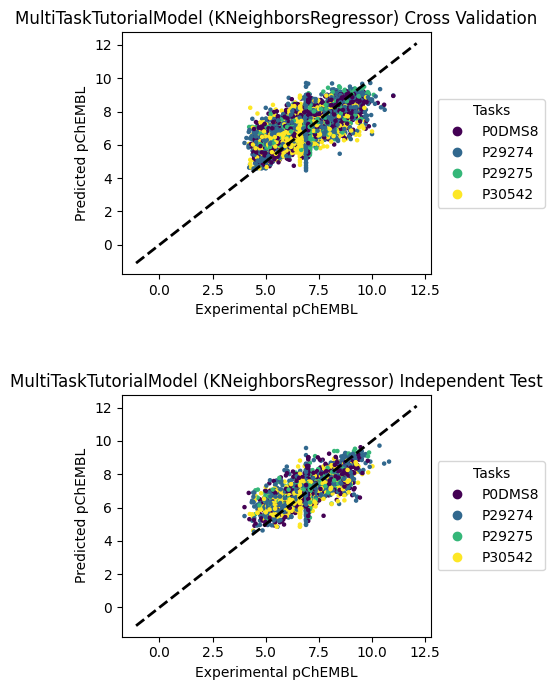

In [20]:
import math
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np

property_name = "pChEMBL"

my_cmap = ["#12517B", "#88002A"]

plt.figure(figsize=(5, 7))
cate = ["../../tutorial_output/models/MultiTaskTutorialModel/MultiTaskTutorialModel.cv.tsv", "../../tutorial_output/models/MultiTaskTutorialModel/MultiTaskTutorialModel.ind.tsv"]
cate_names = ["cv", "ind"]
ret_axes = []
summary = {"ModelName": [], "R2": [], "RMSE": [], "Set": []}


for m, mymodel in enumerate([model]):
    min_val = 0
    max_val = 10
    for j, cate_name in enumerate(['Cross Validation', 'Independent Test']):
        ax = plt.subplot(2, len([model]), m + j + 1)
        ret_axes.append(ax)
        #todo create subplot show can show both plots
        df = pd.read_table(cate[j])
        # column names containing original labels or predictions for the tasks
        label_names = [i for i in list(df.columns.values) if "imputed_Label" in i]  #df[f"{property_name}_imputed_Label"]
        labels = [i.replace("_imputed_Label", '') for i in label_names]
        pred_names = [i for i in list(df.columns.values) if "imputed_Prediction" in i] #df[f"{property_name}_imputed_Prediction"]
        
        # turn ylabel and ypred into np array
        ylabel = df[label_names].to_numpy()
        c = np.zeros(ylabel.shape)
        for k in range(c.shape[1]):
            c[:, k] = k
        c.flatten()
        
        ylabel = ylabel.flatten()
        ypred = df[pred_names].to_numpy().flatten()


        scatter = plt.scatter(
            ylabel,
            ypred,
            s=5,
            c=c)
        coef = metrics.r2_score(ylabel, ypred)
        rmse = metrics.mean_squared_error(
            ylabel, ypred,
            squared=False)
        summary["R2"].append(coef)
        summary["RMSE"].append(rmse)
        summary["Set"].append(cate_names[j])
        summary["ModelName"].append(model.name)

        plt.title(f'{model} {cate_name}')
        plt.xlabel(f"Experimental {property_name}")
        plt.ylabel(f"Predicted {property_name}")
        min_val_now = math.floor(
            min(np.concatenate((ylabel, ypred))))
        max_val_now = math.ceil(
            max(np.concatenate((ylabel, ypred))))
        if min_val_now < min_val:
            min_val = min_val_now
        if max_val_now > max_val:
            max_val = max_val_now
        pad = (max_val - min_val) * 0.1
        plt.plot(
            [min_val - pad, max_val + pad],
            [min_val - pad, max_val + pad],
            lw=2, linestyle='--', color='black')

        handles, _ = scatter.legend_elements()

        plt.legend(handles, labels, title="Tasks", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)